In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# classifier packages
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import joblib

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd '/content/drive/MyDrive/project'

/content/drive/MyDrive/project


Load data -

Load the train, validation and test data from the cleaned and pickled data from previous files.

In [ ]:
import pickle


with open('df_train.pkl', 'rb') as f:
    df_train = pickle.load(f)

with open('df_validation.pkl', 'rb') as f:
    df_validation = pickle.load(f)

In [ ]:
# Split Dataset into Train and Text
from sklearn.model_selection import train_test_split

Merging the comments and title of the respective posts to create single text column.

In [ ]:
# seperating prediction and target features

def xy_data(data):
  
  data.body = data.body + data.clean_title
  data.drop(columns=["clean_title"], axis = 1, inplace=True)

  x_train_features = data['body']
  display(x_train_features.head())

  y_train = data['2_way_label']
  display(y_train.head())

  return x_train_features, y_train

In [ ]:
X_train, Y_train = xy_data(df_train)

0    Someone clearly works deliJudging cheese thats...
1    Isnt miter gauge Yep I dont believe Ive ever s...
2    The shadows wall make look like buck teeth Tha...
3    The thumbnail looks like guy blowing inflatabl...
4    see bacon Should captioned Hello Kittynice kit...
Name: body, dtype: object

0    0
1    0
2    0
3    0
4    0
Name: 2_way_label, dtype: int64

In [ ]:
X_validation, Y_validation = xy_data(df_validation)

0    Its duck I suppose look bit like duck huh Afla...
1    Ive played bass many years never noticed D The...
2    sub makes see faces everything bathroom work l...
3                             Original postskull match
4    CPO really consider face cream A droid age sho...
Name: body, dtype: object

0    0
1    0
2    0
3    0
4    0
Name: 2_way_label, dtype: int64

Accuracy, Precision, Recall, and F1 score

Accuracy - The classifier's accuracy is calculated by dividing the number of accurate predictions by the total number of predictions. In general, precision is not a good measure of performance on its own. For instance, anticipating all texts as belonging to the category with the majority will produce high accuracy levels when categories are unbalanced. Instead of focusing on accuracy, you might want to think about precision and recall to obtain a better picture of how well a classifier performs.

Precision - Out of all the texts that were projected to belong to a particular tag, precision indicates how many were successfully predicted. It's important to remember that precision only provides data in instances where the classifier predicts that the text belongs to a specific tag.

Recall - Out of all the texts that should have been anticipated to correspond to a particular tag, recall counts how many texts were successfully predicted. To put it another way, recall divides the total number of texts that were correctly identified as positive for a particular tag by the total number of texts that were either successfully identified as belonging to the tag or wrongly identified as not belonging to the tag.

F1 score - The harmonic measure of precision and memory is the F1 score. If both precision and recall are considered equally important, it indicates how effectively your classifier works. F1 score is typically a significantly more accurate measure of classifier performance than accuracy is.


In [ ]:
# This function evaluate the model on Accuracy, precision, F1-Score and Recall scores

def getResults(y_test, prediction):
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    print(f'Accuracy : {accuracy}\nPrecision : {precision}\nF1_score : {f1}\nRecall : {recall}\n')
    
    print("===== CONFUSION MATRIX =====")
    cf_matrix = confusion_matrix(y_test, prediction)
    print(cf_matrix)
    
    return accuracy, precision, f1, recall

In [ ]:
# function to train the model

def Model_training(model, x_train, y_train, x_test, y_test):
    print(f'\n==== Testing : {model.__class__}')
    # fit the data
    model.fit(x_train, y_train)
    
    # prediction
    prediction = model.predict(x_test)
    
    # getResults 
    results = getResults(y_test, prediction)
    return results

# Machine Learning Algorithms


MLPClassifier -

Multi-layer Perceptron classifier, or MLPClassifier, is connected to a neural network by the name itself. MLPClassifier uses an underlying Neural Network to carry out the classification task, unlike other classification methods like Support Vectors or Naive Bayes Classifier.

SGD - Stochastic Gradient Descent a linear classifier. popularly used for sparse data problems such as text classification and NLP.

In [ ]:
#model
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.feature_extraction.text import CountVectorizer

mlp = Pipeline([('vect', CountVectorizer(stop_words='english',token_pattern=r'\w{1,}', min_df=10)),
                ('tfidf', TfidfTransformer()),
                ('clf',MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=10,
                     solver='sgd', verbose=10,  random_state=21))
               ])


# Calling the Model_training to get the results
result_mlp = Model_training(mlp, X_train, Y_train, X_validation, Y_validation)




==== Testing : <class 'sklearn.pipeline.Pipeline'>
Iteration 1, loss = 0.67677127
Iteration 2, loss = 0.67358040
Iteration 3, loss = 0.67220073
Iteration 4, loss = 0.67046506
Iteration 5, loss = 0.66818435
Iteration 6, loss = 0.66508596
Iteration 7, loss = 0.66077196
Iteration 8, loss = 0.65460449
Iteration 9, loss = 0.64525882
Iteration 10, loss = 0.63181125
Accuracy : 0.7448418156808804
Precision : 1.0
F1_score : 0.39379084967320266
Recall : 0.2451678535096643

===== CONFUSION MATRIX =====
[[1925    0]
 [ 742  241]]


Logistic Regression - 

Based on a given dataset of independent variables, logistic regression calculates the likelihood that an event will occur, such as voting or not voting. Given that the result is a probability, the dependent variable's range is 0 to 1.

In [ ]:
# Model

lr = Pipeline([('vect', CountVectorizer(stop_words='english',token_pattern=r'\w{1,}', min_df=10)),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression())
               ])

# Calling the Model_training to get the results
result_lr = Model_training(lr, X_train, Y_train, X_validation, Y_validation)



==== Testing : <class 'sklearn.pipeline.Pipeline'>
Accuracy : 0.8651994497936726
Precision : 0.8354143019296254
F1_score : 0.7896995708154507
Recall : 0.7487283825025433

===== CONFUSION MATRIX =====
[[1780  145]
 [ 247  736]]


Random Forest Classifier - 

Random forest is a Supervised Machine Learning algorithm that is frequently employed in Classification and Regression issues. On various samples, decision trees are built, and their majority vote is used to classify data.

In [ ]:
 # model

rf = Pipeline([('vect', CountVectorizer(stop_words='english',token_pattern=r'\w{1,}', min_df=10)),
                ('tfidf', TfidfTransformer()),
                ('clf',  RandomForestClassifier())
               ])

# Calling the Model_training to get the results
result_rf = Model_training(rf, X_train, Y_train, X_validation, Y_validation)



==== Testing : <class 'sklearn.pipeline.Pipeline'>
Accuracy : 0.8462861072902338
Precision : 0.8976261127596439
F1_score : 0.7302353651176826
Recall : 0.6154628687690743

===== CONFUSION MATRIX =====
[[1856   69]
 [ 378  605]]


KneighborsClassifer -

The K in this classifier's name stands for the k nearest neighbours, where k is an integer value that the user specifies. As a result, this classifier employs learning based on the k nearest neighbours, as the name says. Data determines what value of k should be used.

In [ ]:
# Model

knn = Pipeline([('vect', CountVectorizer(stop_words='english',token_pattern=r'\w{1,}', min_df=10)),
                ('tfidf', TfidfTransformer()),
                ('clf',  KNeighborsClassifier())
               ])

# Calling the Model_training to get the results
result_knn = Model_training(knn, X_train, Y_train, X_validation, Y_validation)



==== Testing : <class 'sklearn.pipeline.Pipeline'>
Accuracy : 0.78060522696011
Precision : 0.9859154929577465
F1_score : 0.523168908819133
Recall : 0.3560528992878942

===== CONFUSION MATRIX =====
[[1920    5]
 [ 633  350]]


Stochastic Gradient Descent -

To put it simply, the goal of gradient descent is to reduce a cost function. One of the most widely used algorithms for optimization, gradient descent is by far the most prevalent technique for optimising neural networks. 



In [ ]:
# Model
sgd = Pipeline([('vect', CountVectorizer(stop_words='english',token_pattern=r'\w{1,}', min_df=10)),
                ('tfidf', TfidfTransformer()),
                ('clf',  SGDClassifier())
               ])
# Calling the Model_training to get the results
result_sgd = Model_training(sgd, X_train, Y_train, X_validation, Y_validation)



==== Testing : <class 'sklearn.pipeline.Pipeline'>
Accuracy : 0.8548830811554333
Precision : 0.8934081346423562
F1_score : 0.7511792452830188
Recall : 0.6480162767039674

===== CONFUSION MATRIX =====
[[1849   76]
 [ 346  637]]


The Support Vector Machines (SVM) technique may separate a vector space of tagged texts into two subspaces, one of which contains the majority of the vectors that are associated with a given tag and the other of which contains the majority of the vectors that are not associated with that tag. 

Texts will be converted into vectors via SVM-based classification models, and these vectors will then be used to identify which side of the vector space a given tag belongs to. The model will determine whether a person belongs to a particular tag based on where they land.

In [ ]:
# Model 

svc = Pipeline([('vect', CountVectorizer(stop_words='english',token_pattern=r'\w{1,}', min_df=10)),
                ('tfidf', TfidfTransformer()),
                ('clf',  LinearSVC())
               ])

# Calling the Model_training to get the results
result_svc = Model_training(svc, X_train, Y_train, X_validation, Y_validation)



==== Testing : <class 'sklearn.pipeline.Pipeline'>
Accuracy : 0.8462861072902338
Precision : 0.7740286298568507
F1_score : 0.7720550739418663
Recall : 0.7700915564598169

===== CONFUSION MATRIX =====
[[1704  221]
 [ 226  757]]


# Visualising the results from above models.

We can see that Logestic regression model is giving the highest accracy of about "87" followed by Stochastic Gradient Descent model, Support vector machine algorithm and Random forests.

<Figure size 432x288 with 0 Axes>

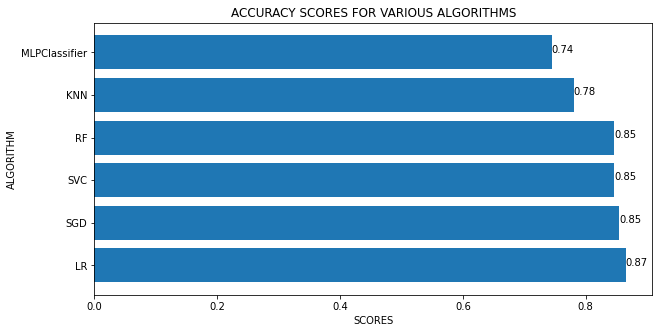

In [ ]:
#Vizualising the findings
fig = plt.figure()
fig = plt.figure(figsize = (10, 5))
methods = ['LR','SGD', 'SVC', 'RF', 'KNN', 'MLPClassifier' ]
scores = [result_lr[0], result_sgd[0],  result_svc[0], result_rf[0],result_knn[0],result_mlp[0], ]
plt.ylabel("ALGORITHM")
plt.xlabel("SCORES")
plt.barh(methods,scores)
plt.title("ACCURACY SCORES FOR VARIOUS ALGORITHMS")
for index, value in enumerate(scores):
    plt.text(value, index, str(round(value, 2)))
plt.show()

# Fine-tuning

Logistic Regression and Stochastic gradient descent were tuned further for analysis.

Cross-validation-

The effectiveness of text classifiers is commonly assessed through the use of cross-validation. The process is easy. The training dataset is first divided into a number of equal-length sections at random. The classifier that was trained on all but one of the subsets was then used to predict the texts in the remaining subset. Up until all of the folds have been used for testing, the procedure is repeated with a fresh testing fold.

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
# Model Selection Accuracy
#modelLR = LogisticRegression()
from sklearn.pipeline import make_pipeline

params = [{
   'C': [0.01, 0.1, 1, 10],
    "penalty" : ["l2", "l1", "elasticnet"],
    'solver': ['lbfgs', 'liblinear']  }]

lr_gs = Pipeline([('vect', CountVectorizer(stop_words='english',token_pattern=r'\w{1,}', min_df=10)),
                ('tfidf', TfidfTransformer()),
                ('clf',GridSearchCV(LogisticRegression(), param_grid=params, scoring= 'accuracy', cv = 2,refit=True))
               ])



lr_gs.fit(X_train, Y_train)

print(lr_gs.named_steps.clf.best_score_)
print(lr_gs.named_steps.clf.best_estimator_)
print(lr_gs.named_steps.clf.best_params_)


0.7529611737341206
LogisticRegression(C=1, penalty='l1', solver='liblinear')
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


['LR_GS_Social.pkl']

In [ ]:
lr_pred = lr_gs.predict(X_validation)

result_lr_hp = getResults(Y_validation, lr_pred)

Accuracy : 0.8610729023383769
Precision : 0.8220244716351501
F1_score : 0.7853347502656749
Recall : 0.7517802644964394

===== CONFUSION MATRIX =====
[[1765  160]
 [ 244  739]]


<Figure size 432x288 with 0 Axes>

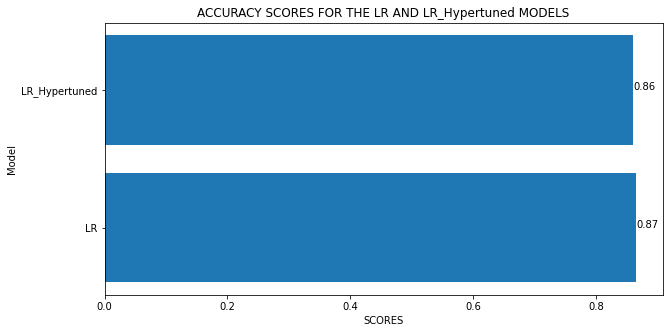

In [ ]:
fig = plt.figure()
fig = plt.figure(figsize = (10, 5))
label = ['LR', 'LR_Hypertuned']
scores = [result_lr[0], result_lr_hp[0]]
plt.ylabel("Model")
plt.xlabel("SCORES")
plt.barh(label,scores)

plt.title("ACCURACY SCORES FOR THE LR AND LR_Hypertuned MODELS")
for index, value in enumerate(scores):
    plt.text(value, index, str(round(value, 2)))
plt.show()

In [ ]:
# hypertuning sgd model

params = [{
   "loss" : [ "log", "hinge"],
     "alpha" : [ 0.01, 0.1],
     "penalty" : ["l1", "elasticnet"]
 }]

sgd_gs = Pipeline([('vect', CountVectorizer(stop_words='english',token_pattern=r'\w{1,}', min_df=10)),
                ('tfidf', TfidfTransformer()),
                ('clf',GridSearchCV(SGDClassifier(), param_grid=params, scoring= 'accuracy', cv = 2,refit=True))
               ])



sgd_gs.fit(X_train, Y_train)

print(sgd_gs.named_steps.clf.best_score_)
print(sgd_gs.named_steps.clf.best_estimator_)
print(sgd_gs.named_steps.clf.best_params_)

0.6562712470925032
SGDClassifier(alpha=0.01, penalty='elasticnet')
{'alpha': 0.01, 'loss': 'hinge', 'penalty': 'elasticnet'}


In [ ]:
#  Try to predict data using this hypertuned method
sgd_gs_pred = sgd_gs.predict(X_validation)

# Print the results 
result_sgd_hp = getResults(Y_validation,sgd_gs_pred)

Accuracy : 0.7472489683631361
Precision : 1.0
F1_score : 0.40292445166531277
Recall : 0.25228891149542215

===== CONFUSION MATRIX =====
[[1925    0]
 [ 735  248]]


<Figure size 432x288 with 0 Axes>

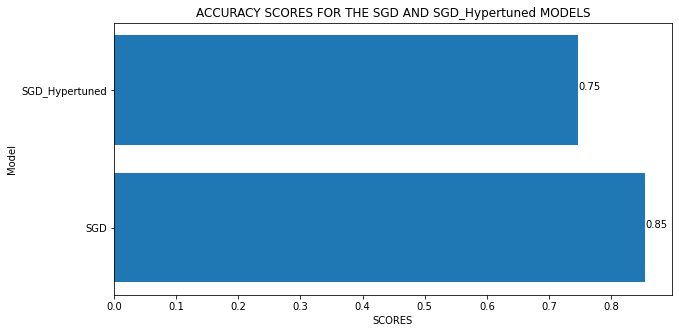

In [ ]:
fig = plt.figure()
fig = plt.figure(figsize = (10, 5))
label = ['SGD', 'SGD_Hypertuned']
scores = [result_sgd[0], result_sgd_hp[0]]
plt.ylabel("Model")
plt.xlabel("SCORES")
plt.barh(label,scores)
plt.title("ACCURACY SCORES FOR THE SGD AND SGD_Hypertuned MODELS")
for index, value in enumerate(scores):
    plt.text(value, index, str(round(value, 2)))
plt.show()